In [52]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import json

# Vision Transformer

In [53]:
history_file = "../temp/20230711_vit_noisy_6_params_no_norm/checkpoint-2800/trainer_state.json"

with open(history_file, "r") as f:
    jsondata = json.load(f)
    best_metric = jsondata["best_metric"]
    best_model_checkpoint = jsondata["best_model_checkpoint"]
    best_epoch = int(int(best_model_checkpoint[-4:]) / 2800 * 200)
    print(best_metric, best_model_checkpoint, best_epoch)
    
    history = jsondata["log_history"]
    vit_epochs = np.array([entry["epoch"] for entry in history])
    vit_eval_loss = np.array([entry[list(entry.keys())[1]] for entry in history])

-1.672697901725769 ./temp/20230711_vit_noisy_6_params_no_norm/checkpoint-2758 197


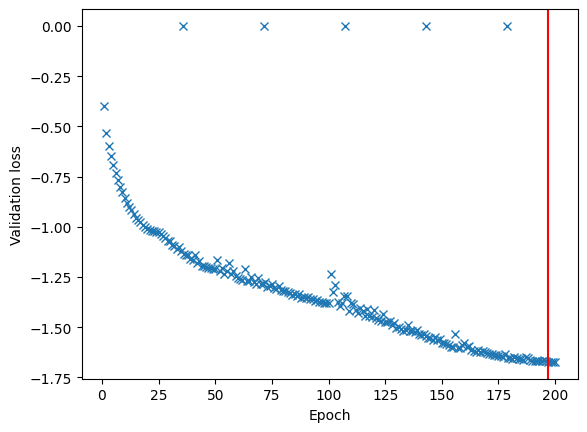

In [54]:
plt.figure()
plt.plot(vit_epochs, vit_eval_loss, marker="x", ls="none")
plt.axvline(best_epoch, color="red")
plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.show()
plt.close()

# ResNet

In [55]:
history_file = "../temp/20230715_resnet_noisy_6_params_no_norm/logs_val.txt"

rn_val_loss = []
rn_epochs = []

with open(history_file, "r") as f:
    for line in f.readlines():
        if not "Val Loss" in line:
            continue
        rn_val_loss += [float(line.split()[-1])]
        rn_epochs += [int(line.split()[1])]

rn_epochs, rn_val_loss

([0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [-1.0091017734483676,
  -1.0091017734483676,
  -1.178424695588059,
  -1.2797334402482934,
  -1.3908272110444737,
  -1.4218039145295145,
  -1.4769999762774921,
  -1.4611783950922763,
  -1.3074631033709367,
  -1.4090432981392005,
  -1.4942897662362074,
  -1.399049129086374,
  -1.3800777384072296,
  -1.4487939080775418,
  -1.4931891421922685,
  -1.5650885814477589,
  -1.4903232637515738,
  -1.4549251507699419,
  -1.5075408120363634,
  -1.4203720773969377])

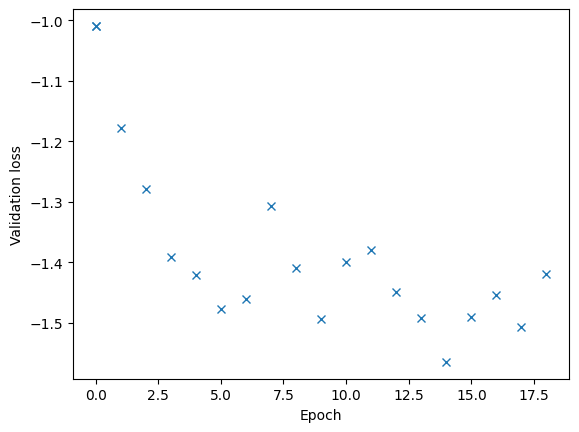

In [56]:
plt.figure()
plt.plot(rn_epochs, rn_val_loss, marker="x", ls="none")
plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.show()
plt.close()

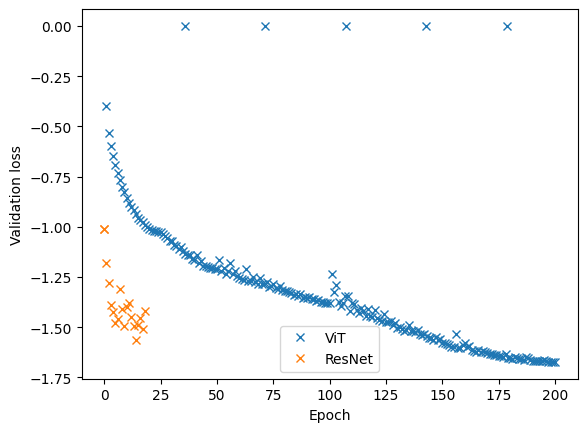

In [57]:
plt.figure
plt.plot(vit_epochs, vit_eval_loss, marker="x", ls="none", label="ViT")
plt.plot(rn_epochs, rn_val_loss, marker="x", ls="none", label="ResNet")
plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.legend()
plt.show()
plt.close()